In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rc('font', size=12)

%run voter_model_with_mutation.ipynb

In [11]:
# Define parameters as in paper
alpha = 10e-5
L = 100

grid_0 = init_grid(L)
n_iters = 5e7

print(n_iters)
grid, num_species = voter_model(grid_0, alpha, n_iters)

50000000.0


Text(0.5, 1.0, 'Grid after 50000000.0 iterations')

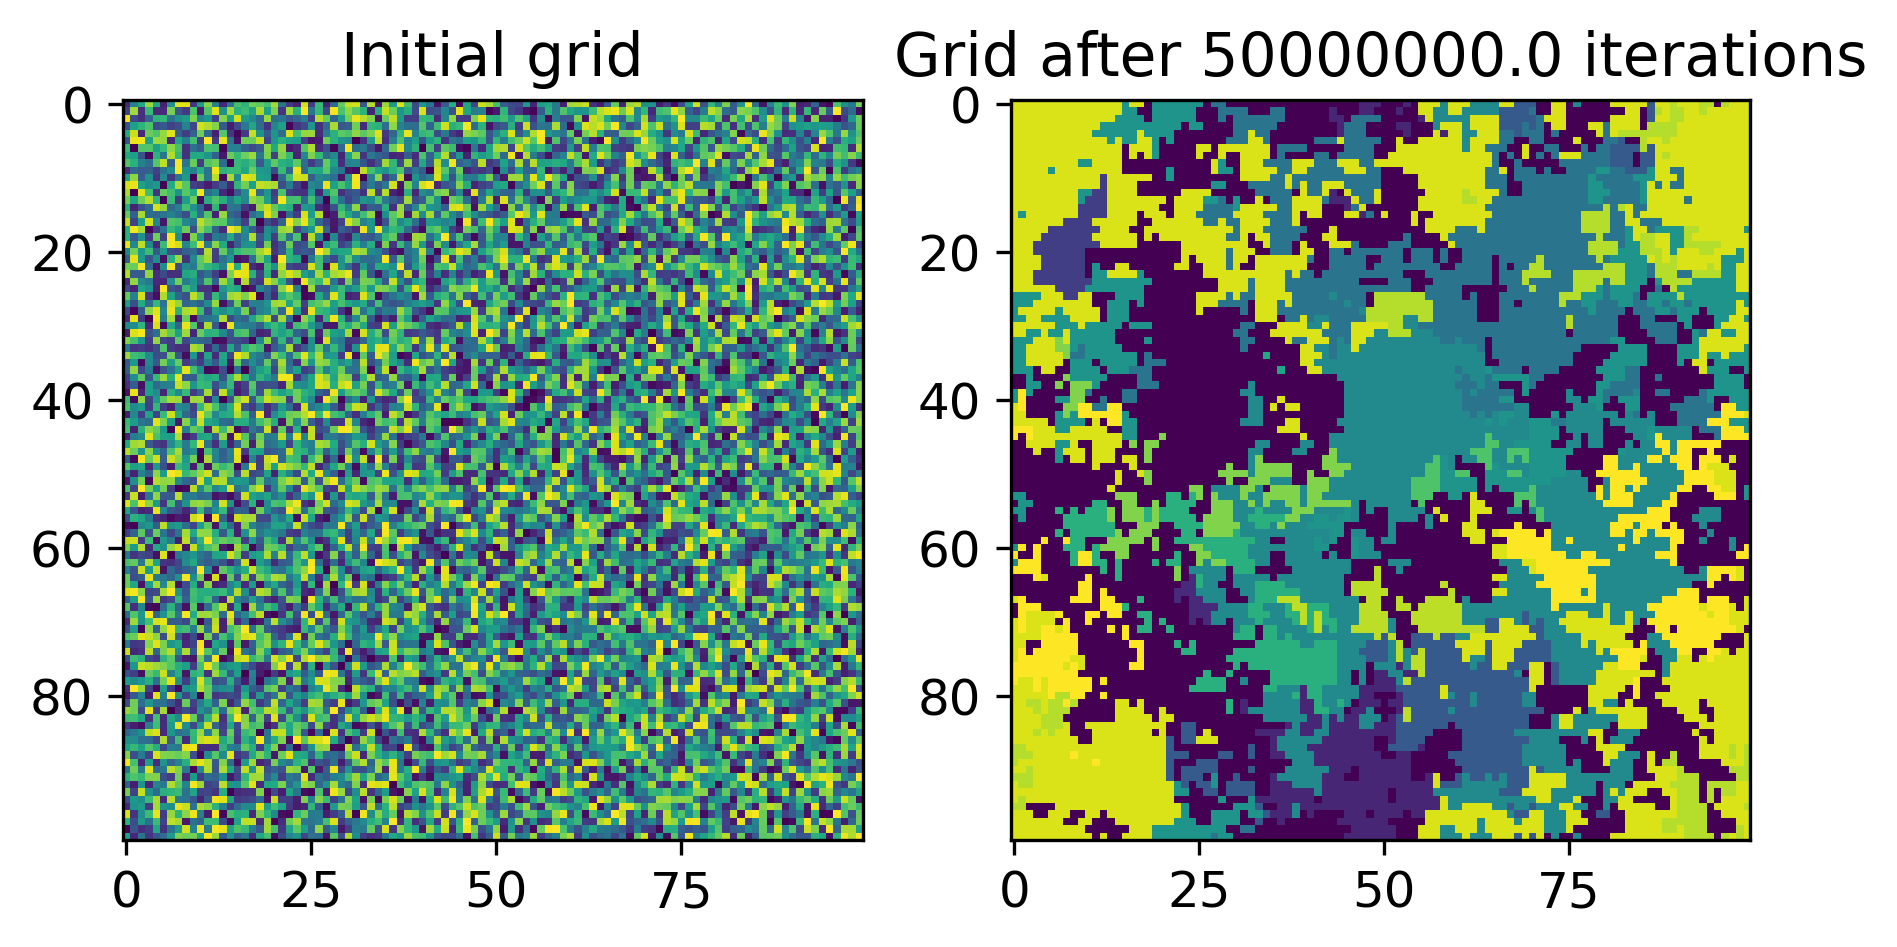

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 7))

ax1.imshow(grid_0)
ax1.set_title('Initial grid')

ax2.imshow(grid)
ax2.set_title(f'Grid after {n_iters} iterations')



Text(0.5, 0, 'Number of iterations (x10)')

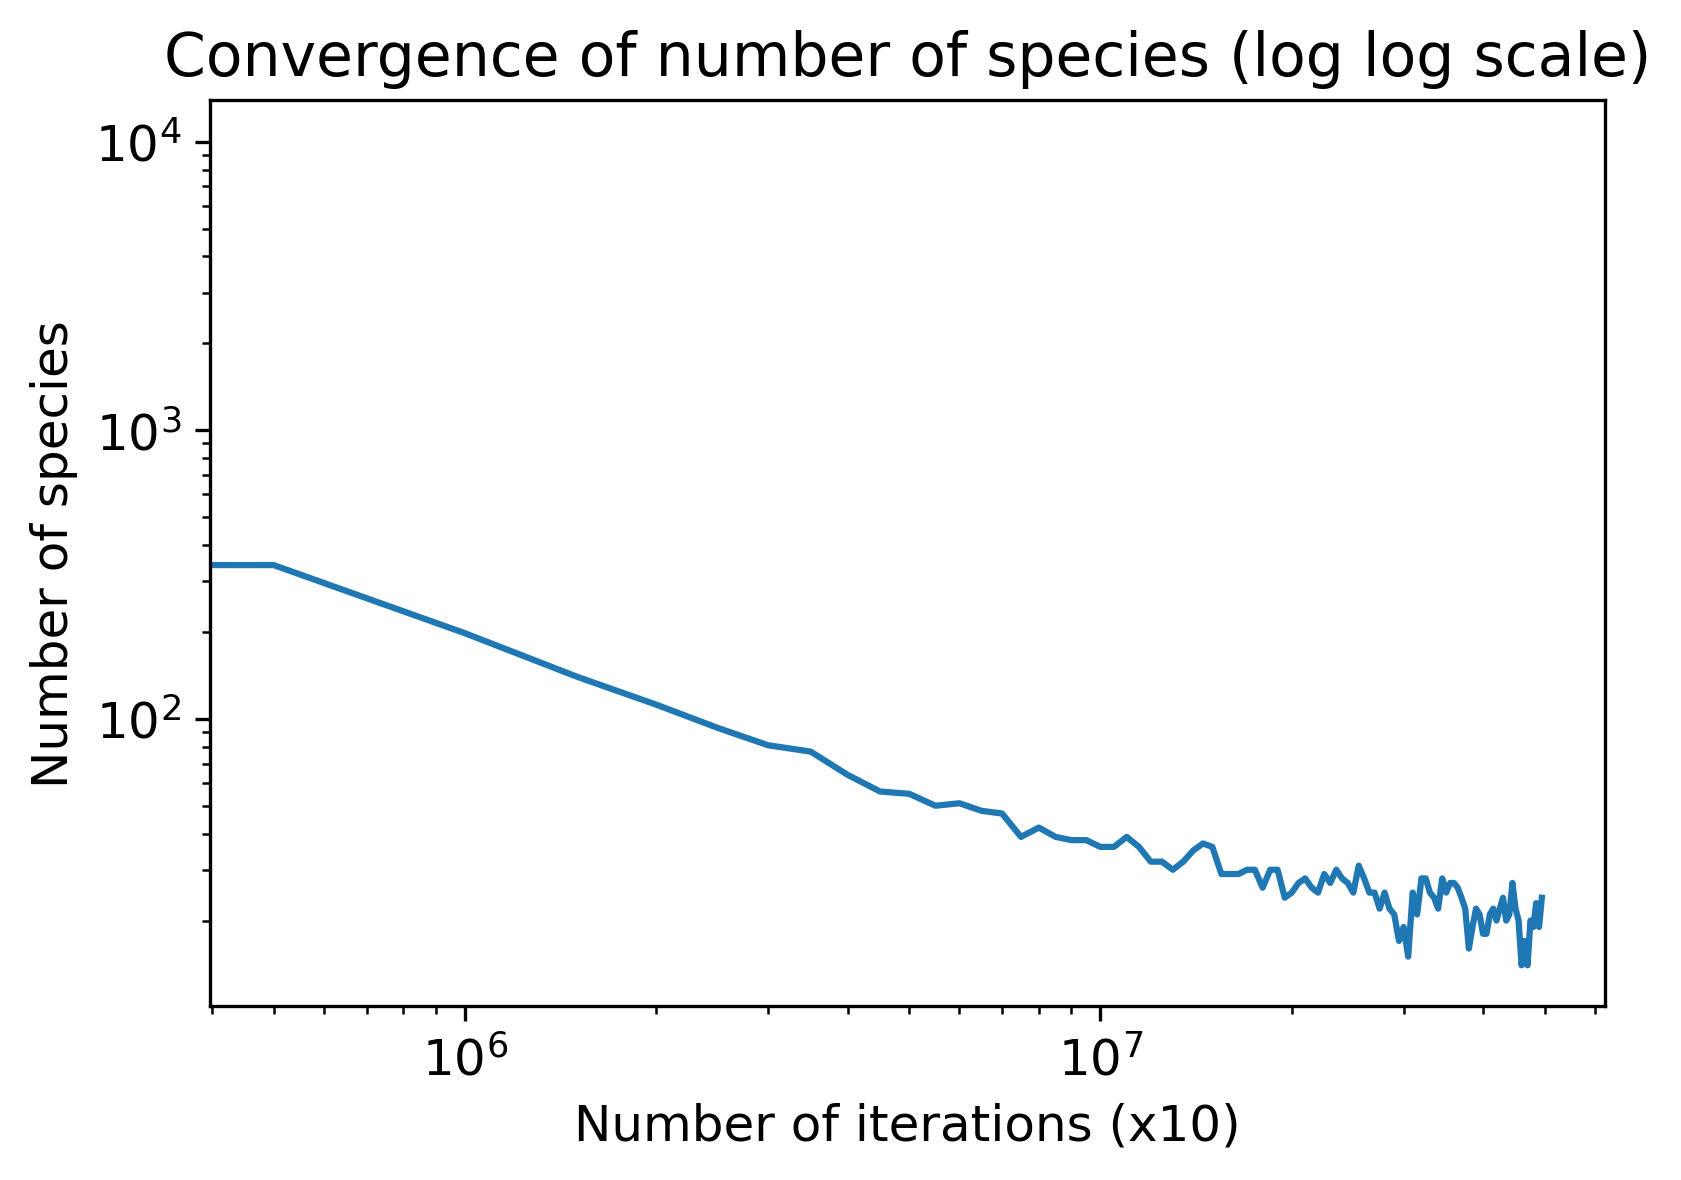

In [13]:
plt.loglog(np.arange(0, n_iters, n_iters/100), num_species)
plt.title('Convergence of number of species (log log scale)')
plt.ylabel('Number of species')
plt.xlabel('Number of iterations (x10)')

In [14]:
center = 49

areas = []
species = []

for i in range(49):
    species.append(len(np.unique(grid[center - i:center + i+1, center - i:center + i+1])))
    areas.append((i+1)**2)
    
res = np.polyfit(np.log(areas), np.log(species), 1)
print(res)

[ 0.46040169 -0.42021198]


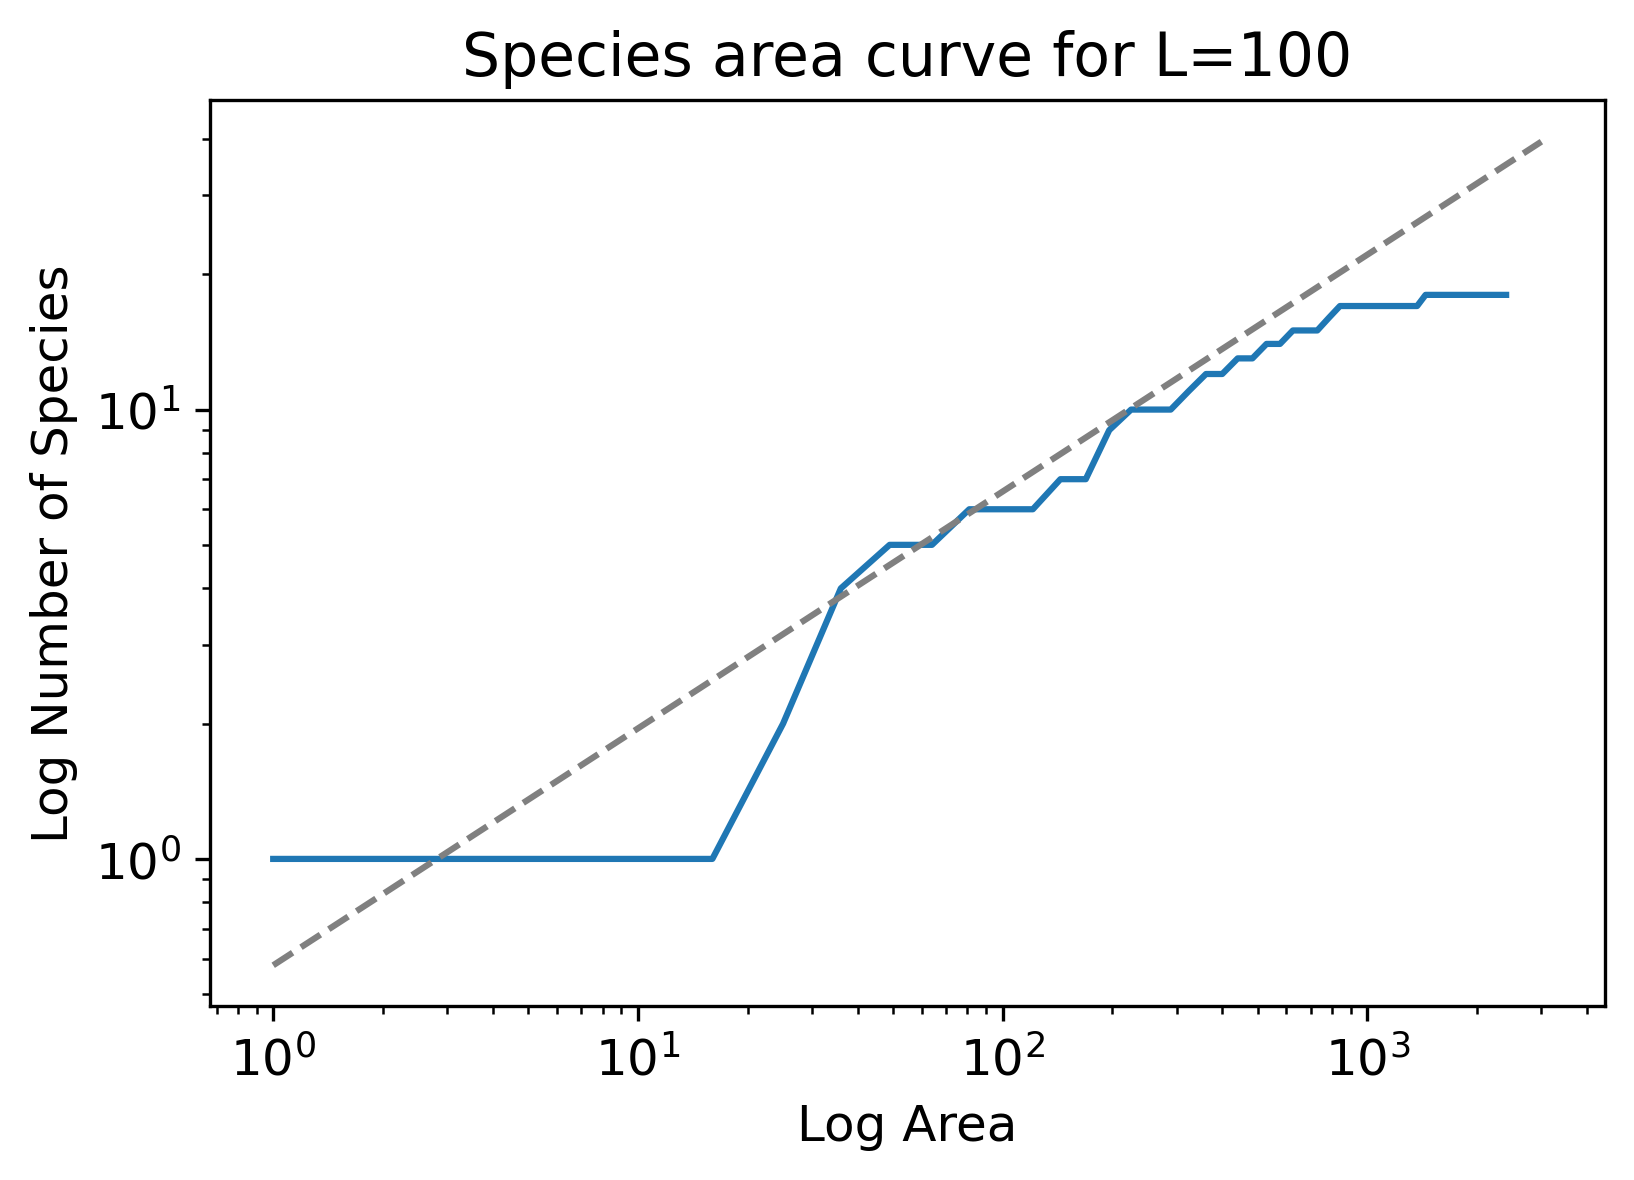

In [15]:
plt.loglog(areas, species)
plt.loglog([1, 3000], res[1] + np.array([1, 3000])**res[0], color='grey', linestyle='dashed')
plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for L={L}')
plt.show()